In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import numpy.ma as ma

In [ ]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [ ]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [40]:
dfmg = pd.read_csv("dfmg.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [41]:
import plot_stations as pltStn
import importlib
importlib.reload(pltStn)

import plot_bathy as pltBathy
import importlib
importlib.reload(pltBathy)

import find_depth_averages_v2 as averageProfile
import plot_var_contours_with_distance as plt2dDepthVsDist

import plot_station_bot_sal as pbs

import plot_topView_contourf as topView
importlib.reload(topView)

import plot_monthly_count as monthCount
importlib.reload(monthCount)

import plot_theta_sal
importlib.reload(plot_theta_sal)

import plot_profiles_vs_dist as profDist

import plot_Profiles_vs_time as profile2dTime

import plotProfileNumber as viewProf

In [42]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25
gline_le_75km = dfmg['DIST_GLINE'] <= 75

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [8]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [44]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [43]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [45]:
salrange = list(np.arange(33.5, 35.05, 0.01))
salrange_disc = list(np.arange(33.5, 35.05, 0.1))
thetarange = list(np.arange(-3, 1, 0.01))
thetarange_disc = list(np.linspace(-3, 1, 10))
RossYears = [2010, 2011, 2012, 2014]
WeddellYears= [2007, 2009, 2011]
PrydzYears = [2011, 2012, 2013, 2015]

# Slope Front Analysis

#### The following 1 profile profile in the Ross Sea consists of unrealistically high values, hence removing

In [11]:
dfmg = dfmg.drop(dfmg.loc[np.isclose(dfmg.CTEMP.values, 13, atol=1)].index)

In [24]:
importlib.reload(profDist)

<module 'plot_profiles_vs_dist' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py'>

## Ross Sea

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.583857878559


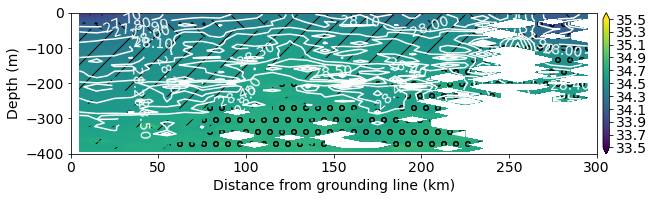

In [46]:
mask = Ross & sel_months(dfmg, [1,2,3])
salrange = list(np.linspace(33.5, 35.5, 200))
ticks = list(np.arange(33.5, 35.6, 0.2))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Ross_Sal_JFM.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange, ticks=ticks, 
                                         legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.88001189917


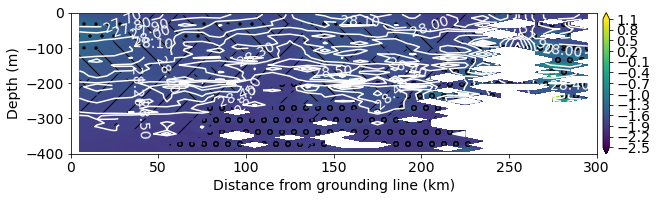

In [48]:
mask = Ross & sel_months(dfmg, [1,2,3])
thetarange = list(np.linspace(-2.5, 1.1, 200)) #[-2.5, -1.9, -1.5, -1.3, -0.7, 0, 0.5, 1.0] #list(np.linspace(-2.5, 0., 5))
ticks = list(np.arange(-2.5, 1.2, 0.3))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, 
                                savename='./Images/profDist/Ross_CT_JFM.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, ticks=ticks, legend_show=False,
                                        cline=cline)

In [325]:
importlib.reload(profDist)

<module 'plot_profiles_vs_dist' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.514690770369


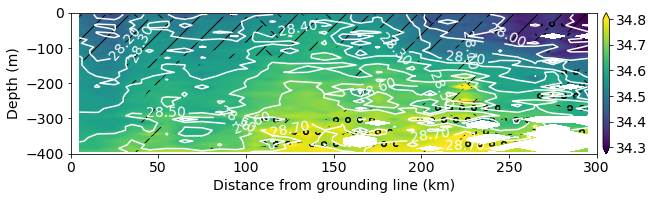

In [51]:
mask = Ross & sel_months(dfmg, [4,5,6])
salrange = list(np.linspace(34.3, 34.8, 200))
ticks = list(np.arange(33.5, 35.1, 0.1))
cline = list(np.arange(27.7, 29, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Ross_Sal_AMJ.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange, ticks=ticks, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.382151957505


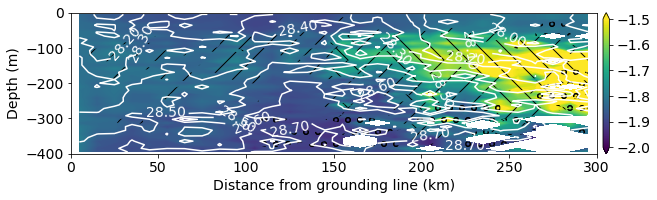

In [52]:
mask = Ross & sel_months(dfmg, [4,5,6])
thetarange =  list(np.linspace(-2., -1.5, 200)) #[-2.5, -1.9, -1.5, -1.3, -0.7, 0]
ticks = list(np.arange(-2.5, -1.1, 0.1))
cline = list(np.arange(27.7, 29, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Ross_CT_AMJ.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, ticks=ticks, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.947725380948


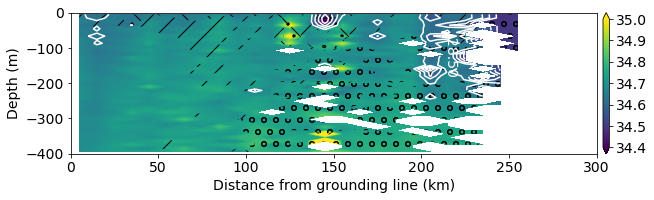

In [38]:
mask = Ross & sel_months(dfmg, [7,8,9])
salrange = list(np.linspace(34.4, 35., 200))
ticks = list(np.arange(34.4, 35, 0.1) )
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Ross_Sal_JAS.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange, ticks=ticks, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.262366117901


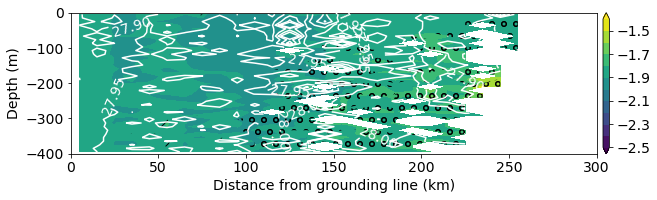

In [18]:
mask = Ross & sel_months(dfmg, [7,8,9])
thetarange =  list(np.arange(-2.5, -1.3, 0.1)) #[-2.5, -1.9, -1.5, -1.3, -0.7, 0]
cline = [27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 27.95, 28, 28.05, 28.1]
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Ross_CT_JAS.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, ticks=thetarange[::2], 
                                         legend_show=False)

## Weddell Sea

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.384012621487


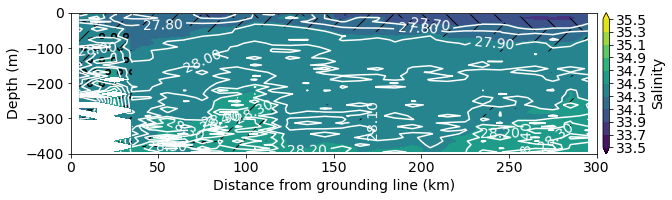

In [30]:
mask = Weddell & sel_months(dfmg, [1,2,3])
salrange = list(np.arange(33.5, 35.6, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Weddell_Sal_JFM.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.95866189169


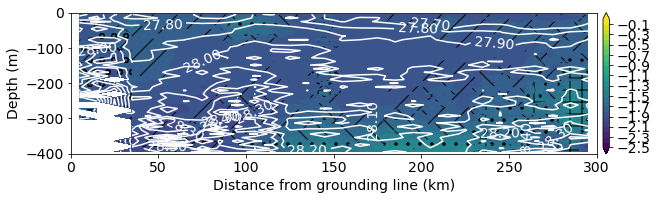

In [31]:
mask = Weddell & sel_months(dfmg, [1,2,3])
thetarange = list(np.arange(-2.5, 0.1, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Weddell_CT_JFM.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.356960707933


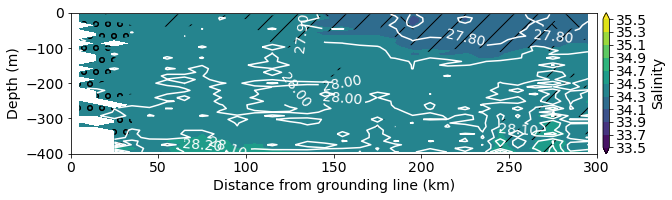

In [32]:
mask = Weddell & sel_months(dfmg, [4,5,6])
salrange = list(np.arange(33.5, 35.6, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Weddell_Sal_AMJ.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.10925178684


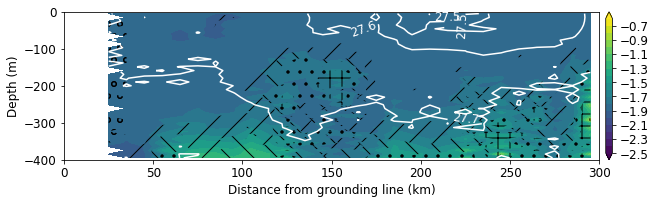

In [262]:
mask = Weddell & sel_months(dfmg, [4,5,6])
thetarange = list(np.arange(-2.5, -0.5, 0.1))
cline = [27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28]
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline,
                                savename='./Images/profDist/Weddell_CT_AMJ.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.153086234811


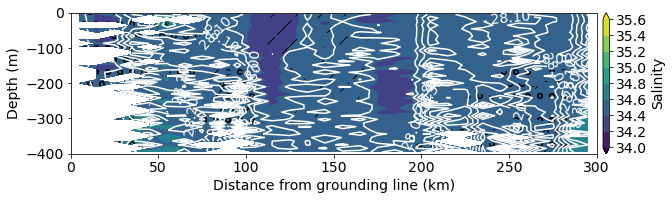

In [33]:
mask = Weddell & sel_months(dfmg, [7,8,9])
salrange = list(np.arange(34, 35.6, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Weddell_Sal_JAS.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.04231140681


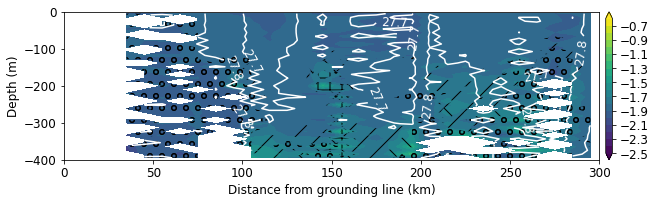

In [264]:
mask = Weddell & sel_months(dfmg, [7,8,9])
thetarange = list(np.arange(-2.5, -0.5, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange[::2],
                                savename='./Images/profDist/Weddell_CT_JAS.png', wd=10, ht=3, 
                                zmin=-400, zbin=10, xbin=10, levs=thetarange, legend_show=False)

## Prydz Bay

In [13]:
!mkdir ./Images/profDist

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.539559896736


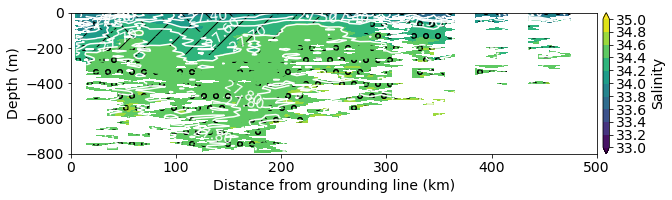

In [19]:
mask = WPB & sel_months(dfmg, [1,2,3])
salrange = list(np.arange(33, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=500, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Prydz_Sal_JFM.png', wd=10, ht=3, 
                                zmin=-800, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.71656766597


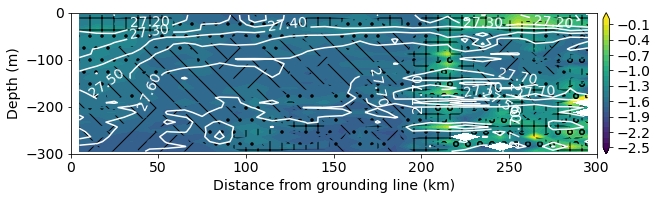

In [21]:
mask = Prydz & sel_months(dfmg, [1,2,3])
thetarange = list(np.arange(-2.5, 0.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange[::3],
                                savename='./Images/profDist/Prydz_CT_JFM.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.947373751465


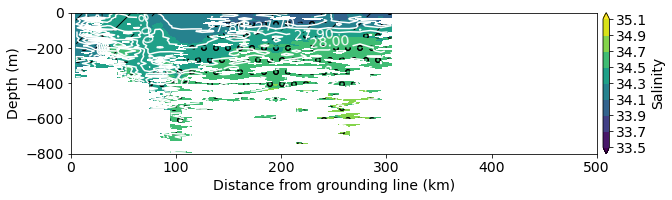

In [34]:
mask = CDP & sel_months(dfmg, [4,5,6])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=500, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/CDP_Sal_AMJ.png', wd=10, ht=3, 
                                zmin=-800, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

1.37952559103


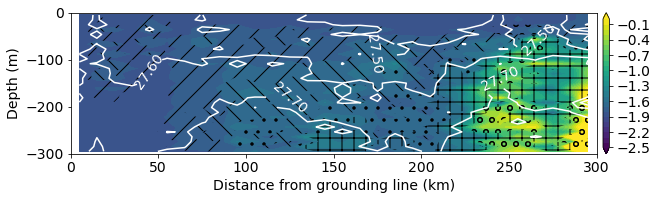

In [24]:
mask = Prydz & sel_months(dfmg, [4,5,6])
thetarange = list(np.arange(-2.5, 0.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange[::3],
                                savename='./Images/profDist/Prydz_CT_AMJ.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.210637241806


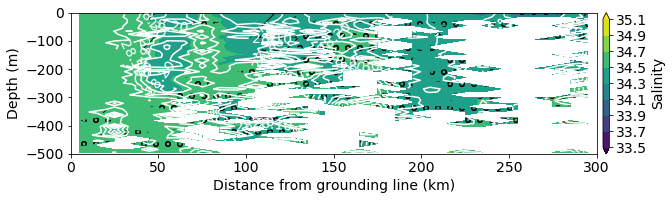

In [36]:
mask = Prydz & sel_months(dfmg, [7,8,9])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = list(np.arange(27.7, 28.5, 0.1))
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Prydz_Sal_JAS.png', wd=10, ht=3, 
                                zmin=-500, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.58843303821


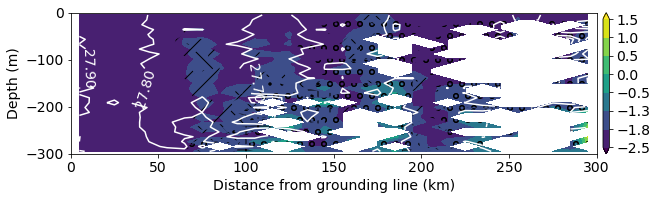

In [62]:
mask = Prydz & sel_months(dfmg, [7,8,9])
#thetarange = list(np.arange(-2.5, 0.1, 0.1))
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange[:],
                                savename='./Images/profDist/Prydz_CT_JAS.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.193483490073


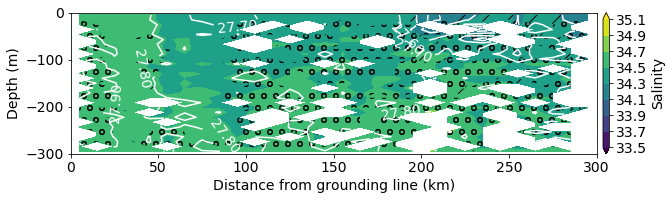

In [27]:
mask = Prydz & sel_months(dfmg, [10,11,12])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/Prydz_Sal_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.81932068376


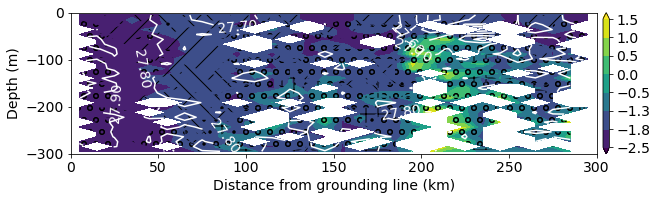

In [61]:
mask = Prydz & sel_months(dfmg, [10,11,12])
#thetarange = list(np.arange(-2.5, 0.6, 0.1))
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Prydz_CT_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

## Cape Darnley

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:50: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  depth_bins = np.linspace(zlowest, 0, number_bins)


61 69 -68 -66


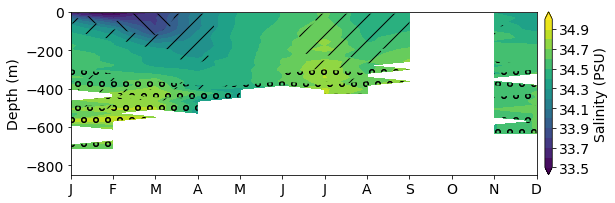

In [77]:
CDP_A1_fh, dl = profile2dTime.plot_sal_contours_with_time(dfmg[CDP&gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=salrange_disc, save=True, type=0, clim=True, wd=10, ht=3,
                                         savename="./Images/seasonal/CDA1_sal.png")

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:238: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  depth_bins = np.linspace(zlowest, 0, number_bins)


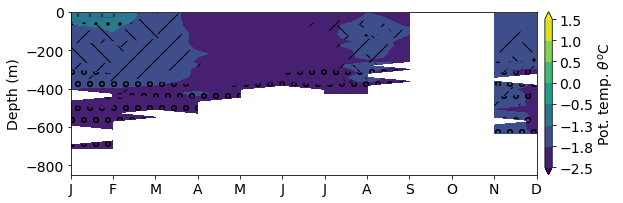

In [80]:
profile2dTime.plot_CT_contours_with_time(dfmg[CDP&gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=thetarange, save=True, clim=True, wd=10, ht=3,
                                         savename="./Images/seasonal/CDA1_CT.png")

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:50: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  depth_bins = np.linspace(zlowest, 0, number_bins)
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/compute_EP_net.py:113: RuntimeWarning: Mean of empty slice
  P_mon_mean[i%12] = np.nanmean(P[i]) * float(monthrange(year[0], i%12+1)[1])
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


60 69 -67 -65


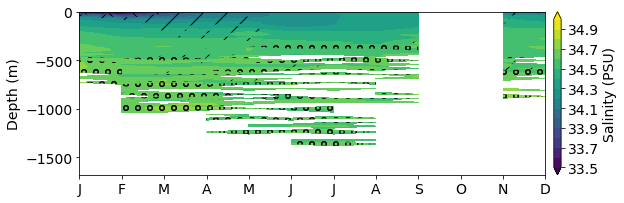

In [81]:
CDP_A1_fh, dl = profile2dTime.plot_sal_contours_with_time(dfmg[CDP&~gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=salrange_disc, save=True, type=0, clim=True, wd=10, ht=3,
                                         savename="./Images/seasonal/CDA2_sal.png")

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:238: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  depth_bins = np.linspace(zlowest, 0, number_bins)


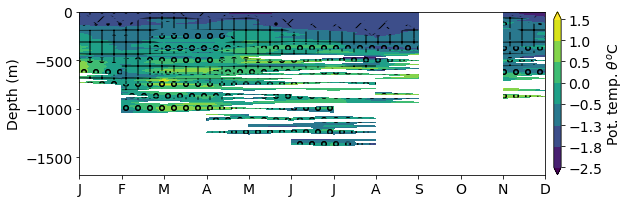

In [82]:
profile2dTime.plot_CT_contours_with_time(dfmg[CDP&~gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=thetarange, save=True, clim=True, wd=10, ht=3,
                                         savename="./Images/seasonal/CDA2_CT.png")

## Knox Coast

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.37310090681


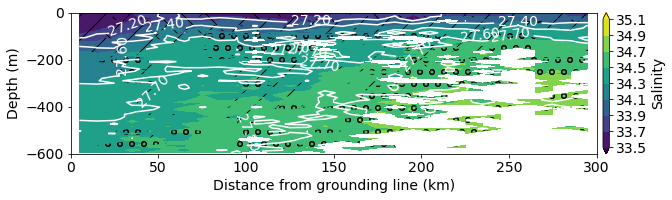

In [67]:
mask = Knox & sel_months(dfmg, [1,2,3])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = [27.2, 27.4, 27.6, 27.7, 27.8]
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_JFM.png', wd=10, ht=3, 
                                zmin=-600, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.57400210283


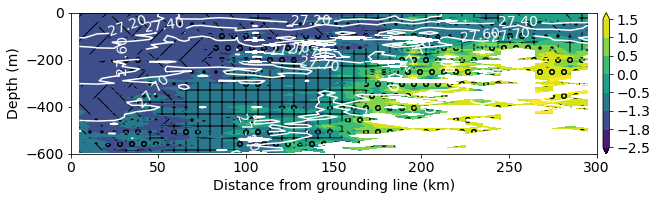

In [68]:
mask = Knox & sel_months(dfmg, [1,2,3])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = [27.2, 27.4, 27.6, 27.7, 27.8]
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Knox_CT_JFM.png', wd=10, ht=3, 
                                zmin=-600, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.46722197387


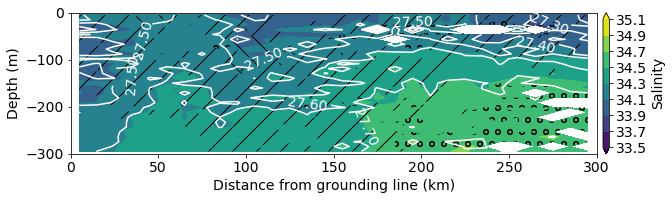

In [31]:
mask = Knox & sel_months(dfmg, [4,5,6])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_AMJ.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.43817718888


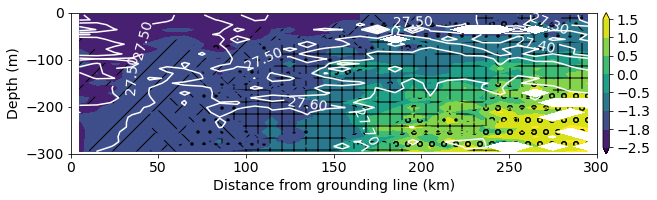

In [50]:
mask = Knox & sel_months(dfmg, [4,5,6])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Knox_CT_AMJ.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.260210172457


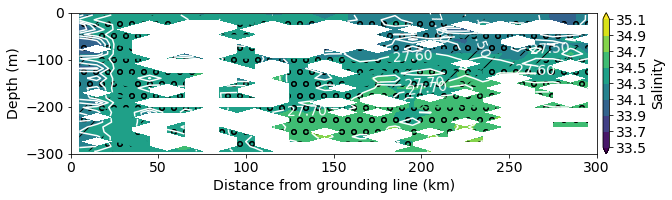

In [32]:
mask = Knox & sel_months(dfmg, [7,8,9])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_JAS.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.66937928802


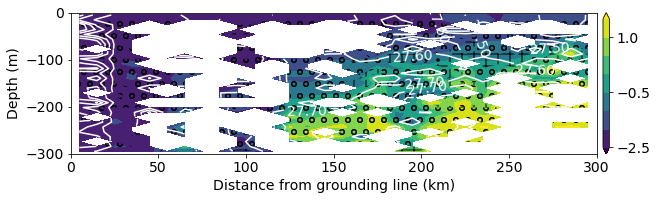

In [48]:
mask = Knox & sel_months(dfmg, [7,8,9])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange[::3],
                                savename='./Images/profDist/Knox_CT_JAS.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.259048661382


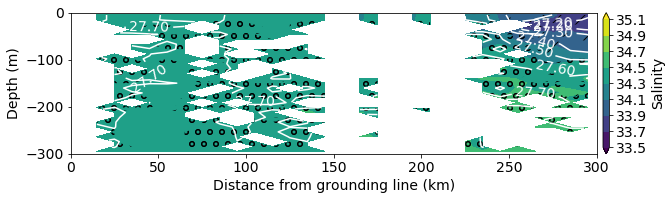

In [33]:
mask = Knox & sel_months(dfmg, [10,11,12])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.69332069831


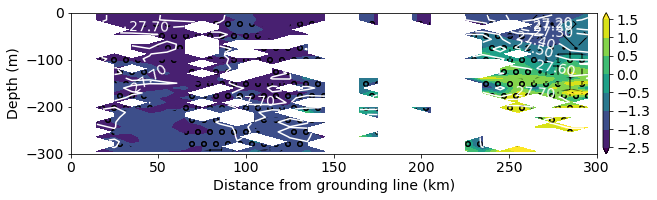

In [47]:
mask = Knox & sel_months(dfmg, [10,11,12])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Knox_CT_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

## Adelie Coast

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.644634210201


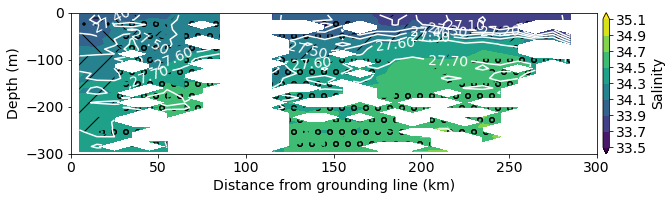

In [34]:
mask = Adelie & sel_months(dfmg, [1,2,3])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_JFM.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.36163285127


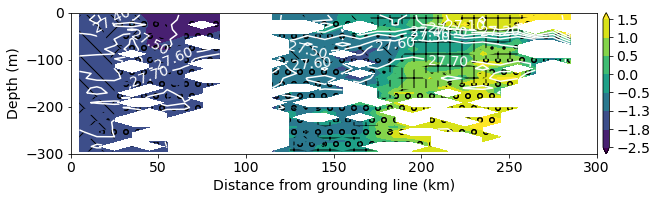

In [53]:
mask = Adelie & sel_months(dfmg, [1,2,3])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Adelie_CT_JFM.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.459920025569


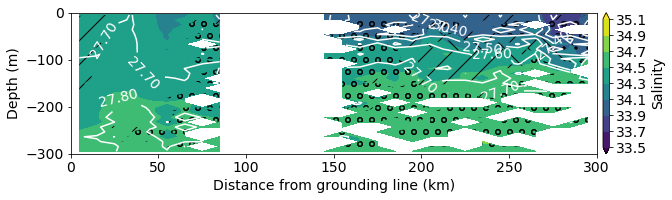

In [35]:
mask = Adelie & sel_months(dfmg, [4,5,6])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_AMJ.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.3451259281


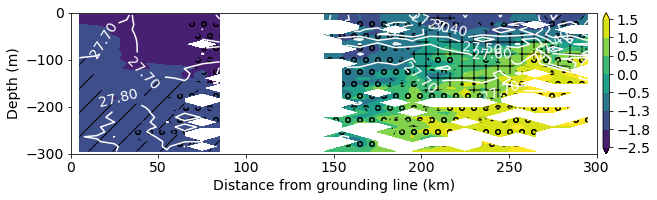

In [54]:
mask = Adelie & sel_months(dfmg, [4,5,6])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Adelie_CT_AMJ.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.401398573351


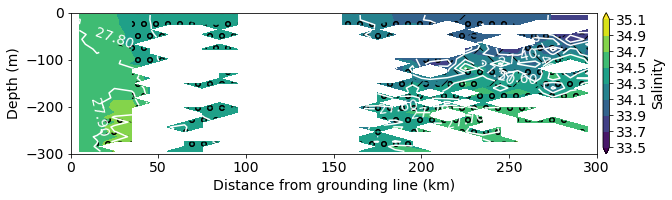

In [36]:
mask = Adelie & sel_months(dfmg, [7,8,9])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_JAS.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


1.53828611156


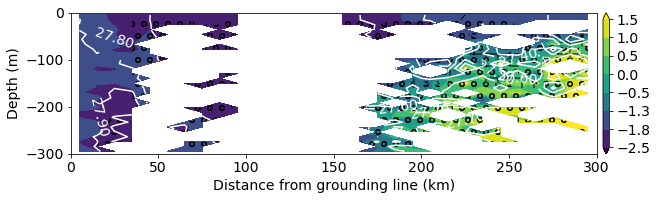

In [57]:
mask = Adelie & sel_months(dfmg, [7,8,9])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Adelie_CT_JAS.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.121751028636


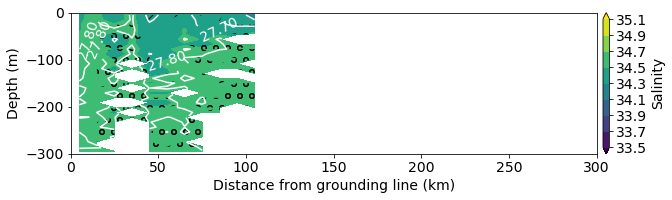

In [37]:
mask = Adelie & sel_months(dfmg, [10,11,12])
salrange = list(np.arange(33.5, 35.1, 0.1))
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='PSAL_ADJUSTED', dist=300, 
                                colorunit='Salinity', save=True, cline=cline,
                                savename='./Images/profDist/KC_Sal_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=salrange[::2], legend_show=False)

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_profiles_vs_dist.py:70: RuntimeWarning: invalid value encountered in less
  print(np.max(conf_int[conf_int < 1e5]))


0.33413042844


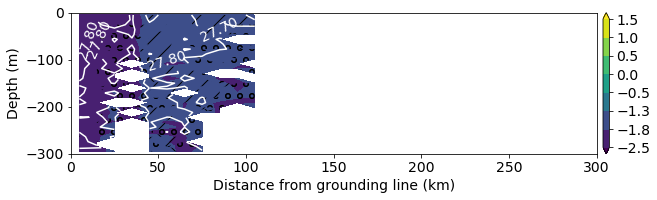

In [58]:
mask = Adelie & sel_months(dfmg, [10,11,12])
thetarange = [-2.5, -1.8, -1.3, -0.5, 0., 0.5, 1., 1.5]
cline = []
profDist.plot_var_contours_with_distance(dfmg, mask=mask, var='CTEMP', dist=300, 
                                colorunit='', save=True, cline=cline, ticks=thetarange,
                                savename='./Images/profDist/Adelie_CT_OND.png', wd=10, ht=3, 
                                zmin=-300, zbin=10, xbin=10, levs=thetarange, legend_show=False)

In [74]:
importlib.reload(profile2dTime)

<module 'plot_Profiles_vs_time' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:50: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  depth_bins = np.linspace(zlowest, 0, number_bins)
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/compute_EP_net.py:113: RuntimeWarning: Mean of empty slice
  P_mon_mean[i%12] = np.nanmean(P[i]) * float(monthrange(year[0], i%12+1)[1])
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


135 144 -67 -65


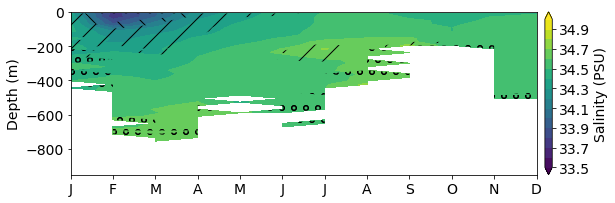

In [75]:
Adelie_A1_fh, dl = profile2dTime.plot_sal_contours_with_time(dfmg[Adelie&gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=salrange_disc, save=True, type=0, clim=True, wd=10, ht=3,
                                         savename="./Images/seasonal/AdelieA1_sal.png")

/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_Profiles_vs_time.py:48: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  zlowest = df.loc[:, 'DEPTH'].min()


135 144 -66 -60


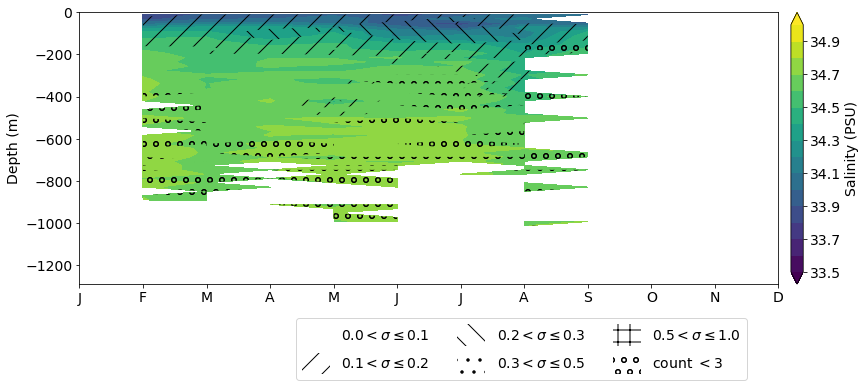

In [72]:
Adelie_A2_fh, dl = profile2dTime.plot_sal_contours_with_time(dfmg[Adelie&~gline_le_75km], 
                                          years=[], depth_max=0, zbin=20,
                                         levs=salrange_disc, save=True, type=0, clim=True, wd=15,
                                         savename="./Images/seasonal/AdelieA2_sal.png")